## Simulação de rede QKD na topologia de rede da China

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.app import *
import numpy as np

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 'TR-1', 'TR-2', 'TR-3', 'OS-1', 'OS-2', 'OS-3']


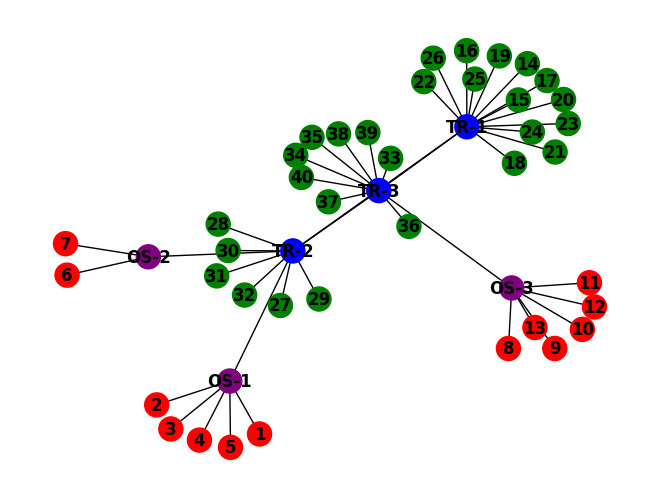

In [2]:
# Definindo rede e controlador
rede = Network()
rede.set_china_topology()
controlador = Controller(rede)
print(rede.G.nodes)
rede.newDraw()

In [3]:
# Exemplo de uso
n_simulacoes = 100
n_requests = 10000
apps = ["BB84", "E91", "B92"]
routes_calculation_type = 'kshortest'

In [4]:
# Calculando e coletando resultados
taxas_sucesso_chaves_geral, vazao = run_simulations(rede, controlador, n_simulacoes, n_requests, apps, routes_calculation_type)
media_sucesso = np.mean(taxas_sucesso_chaves_geral)
desvio_padrao_sucesso = np.std(taxas_sucesso_chaves_geral)
media_vazao = np.mean(vazao)
desvio_padrao_vazao = np.std(vazao)

0-Requisições:  [(36, 25, 'B92', 3), (4, 15, 'B92', 5), (8, 38, 'E91', 3), (34, 4, 'B92', 3), (8, 33, 'BB84', 1), (36, 40, 'B92', 1), (7, 25, 'B92', 5), (27, 24, 'E91', 4), (19, 33, 'BB84', 5), (21, 40, 'BB84', 4), (3, 40, 'BB84', 5), (30, 32, 'E91', 1), (30, 37, 'B92', 4), (31, 39, 'BB84', 2), (25, 27, 'E91', 2), (2, 15, 'BB84', 1), (10, 33, 'BB84', 4), (14, 18, 'B92', 2), (36, 24, 'B92', 3), (12, 15, 'B92', 1), (12, 6, 'B92', 2), (9, 10, 'E91', 4), (3, 21, 'BB84', 4), (28, 17, 'BB84', 1), (18, 3, 'E91', 1), (20, 36, 'B92', 2), (17, 19, 'E91', 1), (40, 30, 'BB84', 2), (8, 26, 'B92', 1), (33, 22, 'E91', 1), (10, 1, 'BB84', 3), (2, 8, 'BB84', 1), (4, 2, 'E91', 2), (18, 14, 'BB84', 1), (14, 26, 'B92', 2), (28, 9, 'E91', 2), (20, 35, 'BB84', 1), (29, 12, 'B92', 2), (36, 7, 'B92', 5), (8, 37, 'E91', 4), (27, 39, 'E91', 1), (37, 39, 'B92', 3), (38, 21, 'E91', 3), (5, 29, 'B92', 2), (5, 4, 'E91', 4), (10, 31, 'BB84', 3), (19, 32, 'E91', 1), (22, 1, 'BB84', 2), (2, 24, 'BB84', 5), (22, 34, 'B

In [5]:
print(formatar_numero(media_vazao),
formatar_numero(desvio_padrao_vazao),
formatar_numero(media_sucesso),
formatar_numero(desvio_padrao_sucesso))

6,6666667 0,0000000 0,2933333 0,0000000


In [6]:
# Formatação para Google Sheets
print(f'=SPLIT("{formatar_numero(media_vazao)} {formatar_numero(desvio_padrao_vazao)} {formatar_numero(media_sucesso)} {formatar_numero(desvio_padrao_sucesso)}"; " ")')

=SPLIT("6,6666667 0,0000000 0,2933333 0,0000000"; " ")


In [7]:
def formatar_planilha():
    apps = ["BB84", "E91", "B92"]
    routes_calculation_type = 'kshortest'
    numero_requests = [100, 1000]
    
    for request in numero_requests:
        taxas_sucesso_chaves_geral, vazao = run_simulations(rede, controlador, n_simulacoes, request, apps, routes_calculation_type)
        media_sucesso = np.mean(taxas_sucesso_chaves_geral)
        desvio_padrao_sucesso = np.std(taxas_sucesso_chaves_geral)
        media_vazao = np.mean(vazao)
        desvio_padrao_vazao = np.std(vazao)
        #print(f'Numero de request atual: {request}')
        print("")
        print(f'=SPLIT("{formatar_numero(media_vazao)} {formatar_numero(desvio_padrao_vazao)} {formatar_numero(media_sucesso)} {formatar_numero(desvio_padrao_sucesso)}"; " ")')

In [8]:
formatar_planilha()

0-Requisições:  [(24, 11, 'E91', 2), (17, 20, 'BB84', 3), (38, 2, 'B92', 2), (29, 4, 'BB84', 3), (12, 17, 'B92', 1), (34, 12, 'E91', 3), (38, 20, 'E91', 1), (38, 32, 'BB84', 1), (32, 31, 'B92', 1), (19, 34, 'B92', 4), (7, 12, 'E91', 1), (16, 5, 'B92', 5), (38, 4, 'E91', 4), (12, 18, 'BB84', 4), (5, 22, 'B92', 2), (1, 35, 'E91', 5), (14, 2, 'E91', 1), (17, 7, 'E91', 2), (15, 2, 'B92', 3), (17, 8, 'B92', 1), (7, 28, 'B92', 5), (1, 14, 'B92', 3), (31, 6, 'BB84', 1), (35, 39, 'B92', 3), (34, 30, 'B92', 3), (24, 14, 'B92', 2), (9, 15, 'B92', 5), (31, 17, 'BB84', 1), (30, 33, 'E91', 2), (12, 32, 'BB84', 3), (21, 33, 'E91', 3), (8, 6, 'BB84', 3), (7, 39, 'B92', 3), (34, 23, 'BB84', 3), (24, 3, 'BB84', 2), (37, 33, 'E91', 5), (16, 28, 'E91', 2), (20, 19, 'B92', 2), (28, 16, 'B92', 1), (26, 34, 'E91', 4), (8, 38, 'B92', 1), (37, 31, 'E91', 1), (37, 4, 'B92', 5), (15, 21, 'E91', 1), (17, 37, 'E91', 3), (12, 36, 'E91', 1), (35, 36, 'BB84', 5), (28, 34, 'E91', 2), (5, 35, 'E91', 5), (23, 21, 'B92'